In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, precision_score
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv("spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [22]:
data = df.where((pd.notnull(df)),'')

In [23]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
data.shape

(5572, 2)

Label Encoding

In [25]:
data.loc[data['Category']=='spam','Category',] = 0
data.loc[data['Category']=='ham','Category',] = 1

spam = 0
ham = 1

In [26]:
x = data['Message']
y=data['Category']

In [27]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [28]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=32)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df = 1,stop_words='english',lowercase='True')

x_train_feature = feature_extraction.fit_transform(x_train)
x_test_feature = feature_extraction.transform(x_test)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [31]:
print(x_train_feature)

  (0, 6863)	0.20621599154121303
  (0, 2498)	0.17697692421919778
  (0, 6281)	0.1415552904299539
  (0, 6253)	0.2596293410969599
  (0, 1641)	0.23896623687751933
  (0, 6133)	0.2596293410969599
  (0, 7260)	0.15678328730835214
  (0, 1664)	0.17516967041511364
  (0, 3733)	0.23896623687751933
  (0, 4074)	0.49508439996018816
  (0, 5523)	0.2797974443195758
  (0, 6290)	0.21165109888225533
  (0, 3807)	0.2222837779809648
  (0, 5571)	0.2222837779809648
  (0, 5597)	0.2596293410969599
  (0, 4066)	0.2596293410969599
  (1, 4065)	0.4282637496593523
  (1, 2098)	0.5538718430266786
  (1, 3971)	0.38547940650657453
  (1, 1027)	0.6010172787776413
  (2, 3011)	0.22722722925542438
  (2, 2756)	0.29523636124084535
  (2, 1518)	0.34483857811427326
  (2, 3784)	0.32878448908644653
  (2, 2385)	0.3013398426210153
  :	:
  (4455, 4003)	0.07593664776720896
  (4455, 1705)	0.07593664776720896
  (4455, 1853)	0.07593664776720896
  (4455, 2380)	0.07240138871818949
  (4455, 1769)	0.061903923791734844
  (4455, 3567)	0.0679474890538

In [34]:
model = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = MultinomialNB()

In [35]:
model.fit(x_train_feature,y_train)
model2.fit(x_train_feature,y_train)
model3.fit(x_train_feature,y_train)
model4.fit(x_train_feature,y_train)

MultinomialNB()

In [36]:
y_pred = model.predict(x_train_feature)
y_pred2 = model2.predict(x_train_feature)
y_pred3 = model3.predict(x_train_feature)
y_pred4 = model4.predict(x_train_feature)

In [37]:
acc = accuracy_score(y_pred,y_train)
pec = precision_score(y_pred4,y_train)
acc2 = accuracy_score(y_pred2,y_train)
acc3 = accuracy_score(y_pred3,y_train)
acc4 = accuracy_score(y_pred4,y_train)

In [38]:
print("Accuracy of training data is:",acc*100)
print("Precision ",pec*100)
print("Accuracy:",acc2*100)
print("Accuracy:",acc3*100)
print(acc4*100)

Accuracy of training data is: 96.81400044873233
Precision  100.0
Accuracy: 100.0
Accuracy: 100.0
98.36212699124972


In [45]:
y_pred_test = model.predict(x_test_feature)
y_pred_test2 = model2.predict(x_test_feature)
y_pred_test3 = model3.predict(x_test_feature)
y_pred_test4 = model4.predict(x_test_feature)
accuracy = accuracy_score(y_pred_test,y_test)
accuracy2 = accuracy_score(y_pred_test2,y_test)
accuracy3 = accuracy_score(y_pred_test3,y_test)
accuracy4 = accuracy_score(y_pred_test4,y_test)
pr_Score = precision_score(y_pred_test4,y_test)

print("Accuracy of test data is:",accuracy*100)
print("Accuracy of test data is:",accuracy2*100)
print("Accuracy of test data is:",accuracy3*100)
print("Accuracy of test data is:",accuracy4*100)
print(pr_Score*100)

Accuracy of test data is: 97.13004484304932
Accuracy of test data is: 96.7713004484305
Accuracy of test data is: 97.9372197309417
Accuracy of test data is: 96.95067264573991
100.0


Predictive System

In [46]:
mail = ["Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030"]
input_data = feature_extraction.transform(mail)

prediction = model.predict(input_data)
print(prediction)

if prediction[0]==1:
    print("Spam")
else:
    print("Not Spam")

[0]
Not Spam


In [48]:
c = confusion_matrix(y_pred_test4,y_test)

<AxesSubplot:>

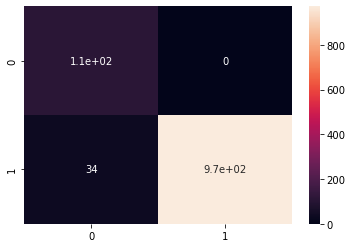

In [49]:
sns.heatmap(c,annot=True,annot_kws={'size':10})

In [50]:
cr = classification_report(y_pred_test,y_test)

In [51]:
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.99      0.88       113
           1       1.00      0.97      0.98      1002

    accuracy                           0.97      1115
   macro avg       0.89      0.98      0.93      1115
weighted avg       0.98      0.97      0.97      1115

